# Test 13: Z-test of a correlation coefficient

## Objective

- To investigate the significance of the difference between a correlation coefficient and a specified value $\rho$.

## Assumptions

- $x$ and $y$ values come from normal distributions
- The variance in $y$ values is independent of $x$
    - Note this does not mean homoscedastic; it just means variance of $y$ is independent of $x$
- The relationship is linear

- If these conditions are not met, use a less precise test: `Test 59 Kendall rank correlation test`

## Method

- Recall from `Test 12` that $$ r = \frac{\sum (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{[\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2]}} $$

- However, there are some downsides to `Test 12` in leaving the correlation coefficient in its original form
    - Since correlation coefficients are bounded between -1 and 1, they are non-normal
    - This has implications for other uses cases. For instance: 
        - when we want to compute confidence intervals
        - when we want to do meta-analysis aggregating across multiple correlation values. Since correlation is not additive, but normal distributions are, it is convenient to aggregate normal distributions instead
    - Moreover, for situations where correlation is extreme (-1, +1), the transformed values may be more accurate than the truncated ones

- Hence, we use a **Fisher Z-Transformation** to transform the correlation coefficient $r$ computed above into a normal distribution 
$$\begin{aligned}
    Z_1 &= \frac{1}{2} \log_e (\frac{1+r}{1-r}) \\
    &= 1.1513 \log_{10} (\frac{1+r}{1-r})
\end{aligned}$$

- $Z_1$ now follows a normal distribution with mean $\mu_{Z_1}$ and standard deviation $\sigma_{Z_1}$. Assuming we want to test the null hypothesis that $r = \rho_0$ where $\rho_0$ is some constant:
$$\begin{aligned}
    \mu_{Z_1} &= \frac{1}{2} \log_e (\frac{1 + \rho_0}{1 - \rho_0}) \\
    &= 1.1513 \log_{10} (\frac{1+r}{1-r}) \\ \\

    \sigma_{Z_1} &= \frac{1}{\sqrt{n-3}}
\end{aligned}$$

- The relevant test statistic is $$ Z = \frac{Z_1 - \mu_{Z_1}}{\sigma_{Z_1}}$$

- This follows a gaussian distribution

## Example

- Problem
    - A market research company has assumed, from previous research, that the correlation between two brands in terms of consumer preference is 0.50. 
    - This value has a bearing on stocking levels in supermarkets since one brand will often substitute for another when the number on the shelves of one product runs out. 
    - A panel of 24 consumers produces a correlation on preference scores (based on a scale of 1 to 20) for the two brands of 0.75.

- Question
    - Can we say that the correlation coefficient is at least 0.50?

In [5]:
import numpy as np

null_hypothesis_correlation = 0.5
sample_correlation = 0.75
n = 24
z1 = 0.5 * np.log((1 + sample_correlation)/(1-sample_correlation))

mu = 0.5 * np.log((1 + null_hypothesis_correlation)/(1-null_hypothesis_correlation))
sigma = 1 / (n-3)**0.5

## Reject null hypothesis under 2 tailed test
Z = (z1 - mu)/sigma
Z

1.9414032906992424

## Proof by simulation that test statistic is gaussian

### Proof by simulation that Fisher Z-Transformation gives an approximately normal distribution

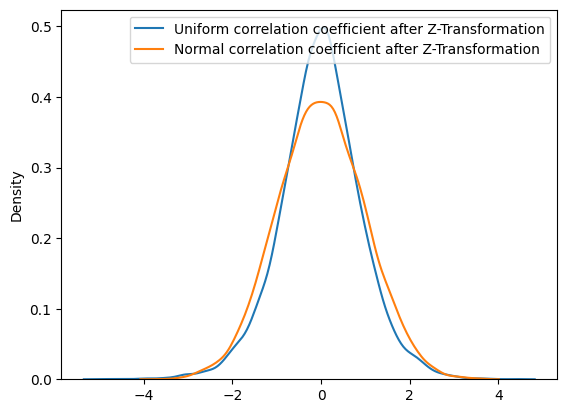

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def tanh(values: np.array):
    return (np.exp(2 * values) - 1) / (np.exp(2 * values) + 1)

uniform_population_of_correlation_values = np.random.uniform(-1,1,10_000)
# exp_population_of_correlation_values = tanh(np.random.exponential(10,10_000))
# beta_population_of_correlation_values = tanh(np.random.beta(10, 20, 10_000))
normal_population_of_correlation_values = tanh(np.random.normal(0,1,10_000))

uniform_correlation_with_fisher_z_trf = 0.5 * np.log((1 + uniform_population_of_correlation_values)/(1-uniform_population_of_correlation_values))
normal_correlation_with_fisher_z_trf = 0.5 * np.log((1 + normal_population_of_correlation_values)/(1-normal_population_of_correlation_values))

## Fisher Z-transformation works better under uniform distribution
sns.kdeplot(uniform_correlation_with_fisher_z_trf, label='Uniform correlation coefficient after Z-Transformation')
sns.kdeplot(normal_correlation_with_fisher_z_trf, label='Normal correlation coefficient after Z-Transformation')
plt.legend()

### Proof by simulation that test statistic is normal

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
import numpy as np

UNKNOWN_CORRELATION = 0.5
SAMPLE_SIZE = 100

# Existing array
X1_POPULATION = np.random.normal(0,1,10_000)

# Simulate x2 to have the defined correlation with x1
# See https://stats.stackexchange.com/questions/13382/how-to-define-a-distribution-such-that-draws-from-it-correlate-with-a-draw-from/13384#13384
X2_POPULATION = (UNKNOWN_CORRELATION * X1_POPULATION) + (((1 - UNKNOWN_CORRELATION**2)**0.5) * np.random.normal(0,1,10_000))

HYPOTHESIZED_CORRELATION = 0.5

def fisher_z_transform(correlation_coefficient):
    return 0.5 * np.log((1+correlation_coefficient)/(1-correlation_coefficient))

def get_single_test_statistic():
    sample_ids = np.random.choice(
        range(len(X1_POPULATION)),
        size = SAMPLE_SIZE,
        replace=False
    )
    
    x1_sample = X1_POPULATION[sample_ids] 
    x2_sample = X2_POPULATION[sample_ids]
    
    numerator = np.sum(
        (x1_sample - np.mean(x1_sample)) * 
        (x2_sample - np.mean(x2_sample))
    ) 
    denom1 = np.sum(
        (x1_sample - np.mean(x1_sample))**2
    )
    denom2 = np.sum(
        (x2_sample - np.mean(x2_sample))**2
    )
    sample_correlation = numerator / ((denom1 * denom2)**0.5)
    
    z1 = fisher_z_transform(sample_correlation)
    mu = fisher_z_transform(HYPOTHESIZED_CORRELATION)
    sigma = 1 / ((SAMPLE_SIZE-3)**0.5)

    test_statistic = (z1 - mu)/sigma

    return test_statistic
# get_single_test_statistic()

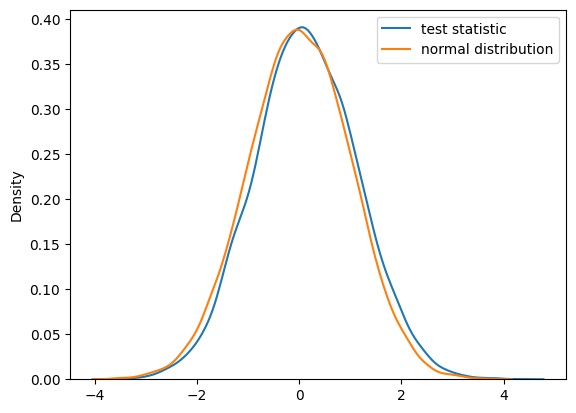

In [260]:
test_statistic_distribution = [get_single_test_statistic() for _ in range(10_000)]
true_normal_distribution = np.random.normal(0,1,10_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_normal_distribution, label='normal distribution')
plt.legend()